In [241]:
library(tidyverse)
library(forecast)
library(repr) # Resizing the plots in jupyter
library(rugarch) 
library(readxl)
library(dynlm)
library(Hmisc)
library(gridExtra)

options(repr.plot.width=8, repr.plot.height=4)

In [229]:
b <- cumsum(rnorm(100))
x <- 1:100
sd <- 1.96*sqrt(1:100)
t <- 1

df <- data.frame(x, b, sd, t)
a1 <- ggplot(df, aes(x,b)) + 
geom_line() + 
geom_line(aes(x,t), color="red") + 
geom_ribbon(aes(ymin=t-sd, ymax=t+sd), alpha=0.09, fill="red") + 
labs(title="Random walk or stocastic trend") +
scale_y_continuous(limits=c(-25, 25))

In [227]:
b <- cumsum(rnorm(100)+0.3)
x <- 1:100
sd <- 1.96 * sqrt(1:100)
t <- 0.3*1:100

df <- data.frame(x, b, sd, t)
a2 <- ggplot(df, aes(x,b)) + 
geom_line() + 
geom_line(aes(x,t), color="red") + 
geom_ribbon(aes(ymin=t-sd, ymax=t+sd), alpha=0.09, fill="red") + 
labs(title="Random walk plus drift or unit root process") + 
scale_y_continuous(limits=c(-10, 50))

In [224]:
ny <- arima.sim(n = 100, list(ma = c(0.8, 0.4)))

d <- 0
sd <- sqrt(1^2*(1+0.8^2+0.4^2))*1.96
df <- data.frame(x, ny, sd, d)

a3 <- ggplot(df, aes(x,ny)) + 
geom_line() + 
geom_line(aes(x,d), color="red") + 
geom_ribbon(aes(ymin=d-sd, ymax=d+sd), alpha=0.09, fill="red") + 
labs(title="Stationary") + 
scale_y_continuous(limits=c(-15, 15))

In [242]:
t <- 1:100
ny <- arima.sim(n = 100, list(ma = c(0.8, 0.4)))
ny <- ny + t*0.2

d <- 0 + t*0.2
sd <- sqrt(1^2*(1+0.8^2+0.4^2))*1.96
df <- data.frame(x, ny, sd, d)

a4 <- ggplot(df, aes(x,ny)) + 
geom_line() + 
geom_line(aes(x,d), color="red") + 
geom_ribbon(aes(ymin=d-sd, ymax=d+sd), alpha=0.09, fill="red") + 
labs(title="Trend stationary (deterministic trend)") +
scale_y_continuous(limits=c(-5, 25))

# Random walk == process with stocastic trend == Unit root process

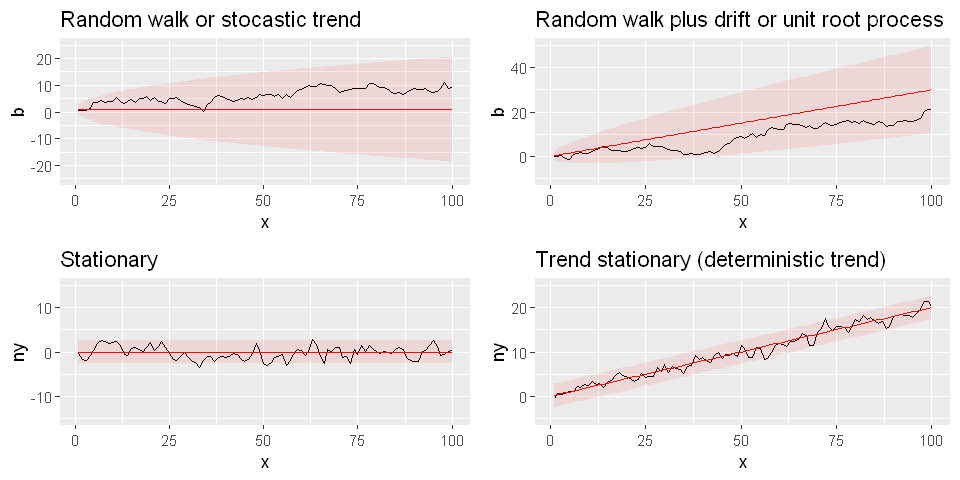

In [240]:
grid.arrange(a1,a2,a3,a4, ncol=2)